## lab2 - 逻辑回归 ##

目标：使用逻辑完成一个分类问题，同时对于算法进行正则来防止过拟合

### 1.逻辑回归 ###

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
path = 'ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


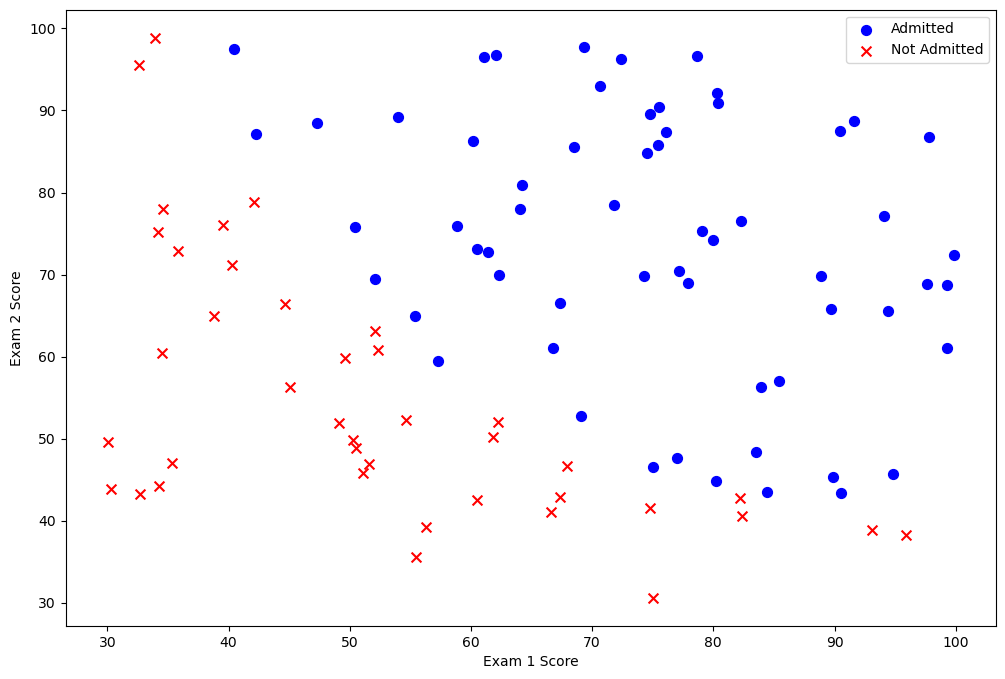

In [122]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [123]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

目的：画一个sigmoid的图，保证正常

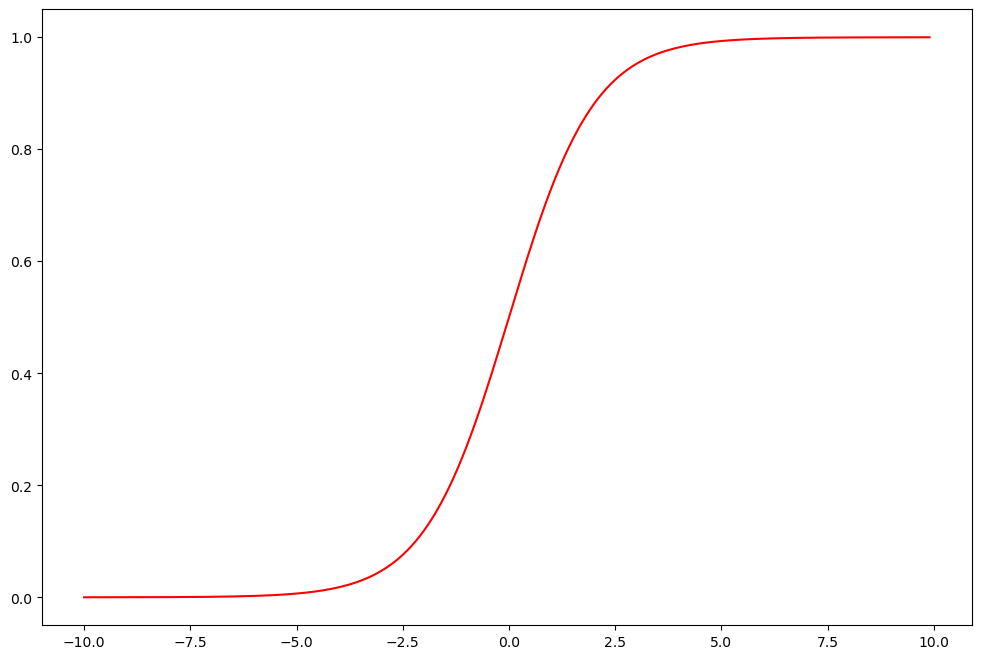

In [124]:
nums=np.arange(-10,10,step=0.1)

f=sigmoid(nums)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(nums,sigmoid(nums),'r')
plt.show()

编写对于逻辑回归的代价函数

In [125]:
def cost(theta,X,y):
    theta = np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second= np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second) / (len(X))

预处理x和y的数据  
具体来说：
1. 添加西塔0的一列
2. 分割x和y值
3. 转化x和y变成np的array

In [126]:
data.insert(0,'Ones',1)

cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

X=np.array(X.values)
y=np.array(y.values)
theta=np.zeros(3)

In [127]:
X.shape,theta.shape,y.shape

((100, 3), (3,), (100, 1))

In [128]:
cost(theta,X,y)

0.6931471805599453

得到了代价函数，现在需要做的是用gd来优化代价函数值

### gradient descent(梯度下降) ###

目的：通过bgd来获得训练完的代价函数   
对我：复习对于逻辑回归的bgd偏导公式

In [129]:
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)

    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)

    error=sigmoid(X*theta.T)-y

    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
        
    return grad

目的：计算一步的梯度下降如何进行

In [130]:
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [131]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))
result

(array([-25.16131856,   0.20623159,   0.20147149]), 36, 0)

In [132]:
cost(result[0],X,y)

0.20349770158947486

### 1.1 针对库函数的应用，但是我要写一个模仿lab1的全手写学习率和迭代次数的版本 ###

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [141]:
def gradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    costF = np.zeros(iters)

    for i in range(iters):
        error = sigmoid(X*theta.T)-y

        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))

        theta=temp
        costF[i]=cost(theta,X,y)
        
    return theta,costF

In [147]:
alpha=0.0001
iters = 1000
theta2=np.matrix(np.array([0,0,0]))
theta2.shape

(1, 3)

In [148]:
g,costAns=gradientDescent(X,y,theta2,alpha,iters)
g

C:\Users\hasee\AppData\Local\Temp\ipykernel_10120\3805851753.py:6: RuntimeWarning: divide by zero encountered in log
  second= np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
C:\Users\hasee\AppData\Local\Temp\ipykernel_10120\3805851753.py:6: RuntimeWarning: invalid value encountered in multiply
  second= np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))


matrix([[0.00499669, 0.32800396, 0.33089067]])

In [149]:
cost(g,X,y)

C:\Users\hasee\AppData\Local\Temp\ipykernel_10120\3805851753.py:6: RuntimeWarning: divide by zero encountered in log
  second= np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
C:\Users\hasee\AppData\Local\Temp\ipykernel_10120\3805851753.py:6: RuntimeWarning: invalid value encountered in multiply
  second= np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))


nan

遇到的问题：
1. 对于逻辑回归来说需要矩阵处理对应的sigmoid函数来获取代价函数
2. 我出现了sigmoid的值出现问题的情况
3. 为什么theta需要创建一个数组而非矩阵
4. 为什么可以X*theta.T
5. 为什么会趋近于0之类的但是对于使用sci库就没有出现这种情况呢？

解答:
1. 对于numpy来说exp会逐元素运算，并且最后返回一个矩阵
2. 打打
3. 对于scipy的函数来说输入的x0必须是一维的
4. 就是对于每行的X做一个矩阵运算，快速计算得到答案。对于理论上而言，所有x和theta都应该为列向量计算，但是实际情况来看，一般theta作为一维保存，x其实是转置保存的，所以(theta.T*X)和(X.T*theta)这样子导致看起来是X*theta.T。

得到结果后对于h来进行一个评估

In [150]:
def predict(theta,X):
    probability=sigmoid(X*theta.T)
    return [1 if x >=0.5 else 0 for x in probability]

In [152]:
theta_min=np.matrix(result[0])
predictions=predict(theta_min,X)
correct=[1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for(a,b) in zip(predictions,y)]
accuracy=(sum(map(int,correct))%len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


## 正则逻辑回归 ## 

In [153]:
path='ex2data2.txt'
data2=pd.read_csv(path,header=None,names=['Test 1','Test 2','Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


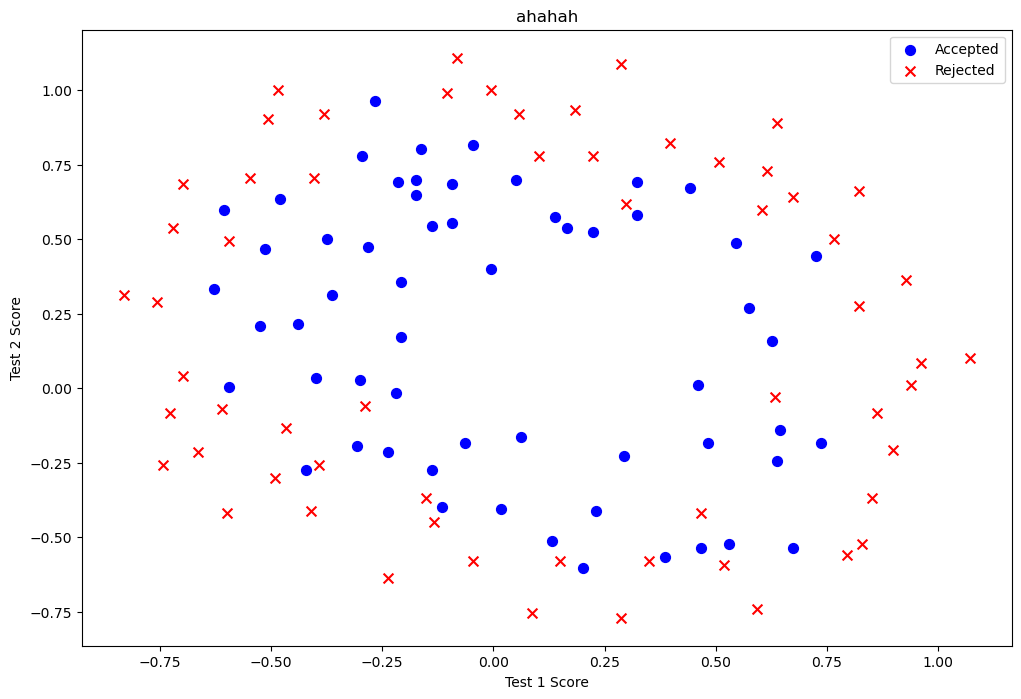

In [163]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'],positive['Test 2'],s=50,c='b',marker='o',label='Accepted')
ax.scatter(negative['Test 1'],negative['Test 2'],s=50,c='r',marker='x',label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
ax.set_title('ahahah')
plt.show()

#出现问题，test和1中间有空格。

In [164]:
degree = 5
x1=data2['Test 1']
x2=data2['Test 2']

data2.insert(3,'Ones',1)

for i in range(1,degree):
    for j in range(0,i):
        data2['F'+str(i)+str(j)]=np.power(x1,i-j)*np.power(x2,j)

data2.drop('Test 1',axis=1,inplace=True)
data2.drop('Test 2',axis=1,inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


对于正则化，我需要创造一堆x用来对应我额外产生的theta，
因为显然对于直线的线性回归这个图像的拟合度是低的离谱，所以考虑随便加点
x和theta用来拟合这个图

## regularized cost(正则化代价函数) ##

In [178]:
def costReg(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first= np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    reg = (learningRate/(2*len(X))) * np.sum(np.power(theta[:,1:],2))
    return np.sum((first-second)/len(X)) +reg

In [181]:
def gradientReg(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)

    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)

    error = sigmoid(X*theta.T)-y 

    for i in range(parameters):
        term=np.multiply(error,X[:,i]) #公式

        if(i==0):
            grad[i]=np.sum(term)/len(X)
        else:
            grad[i]=(np.sum(term)/len(X)) +  ((learningRate / len(X)) * theta[:,i])
    return grad

处理数据x和y

In [173]:
cols = data2.shape[1]
x2=data2.iloc[:,1:cols]
y2=data2.iloc[:,0:1]

x2=np.array(x2.values)
y2=np.array(y2.values)
theta2 = np.zeros(11)

In [174]:
learningRate=1

In [179]:
costReg(theta2,x2,y2,learningRate)

0.6931471805599451

In [182]:
gradientReg(theta2,x2,y2,learningRate)

C:\Users\hasee\AppData\Local\Temp\ipykernel_10120\1843809497.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i]=(np.sum(term)/len(X)) +  ((learningRate / len(X)) * theta[:,i])


array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [183]:
result2 = opt.fmin_tnc(func=costReg,x0=theta2,fprime=gradientReg,args=(x2,y2,learningRate))
result2

C:\Users\hasee\AppData\Local\Temp\ipykernel_10120\1843809497.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i]=(np.sum(term)/len(X)) +  ((learningRate / len(X)) * theta[:,i])


(array([ 0.53010248,  0.29075567, -1.60725764, -0.5821382 ,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]),
 22,
 1)

再使用预测方法进行分析：
具体来说就是对于prediction的y和真正的y值对比然后判断正确率 

In [189]:
theta_best=np.matrix(result2[0])
predictions = predict(theta_best,x2)
correct = [ 1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y2)]
accuracy = (sum(map(int,correct))) / len(correct)
print('accuracy = {0}%'.format(accuracy))

accuracy = 0.6610169491525424%


手写了一堆，然后其实scikit-learn已经有封装好的包来用了

In [205]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2',C=1.0)
model.fit(x2, y2.ravel())

LogisticRegression()

In [206]:
model.score(x2,y2)

0.6610169491525424

我嘞个都